# Librerías

In [36]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt
import requests

# Carga de imagen

size =  (1024, 1024)


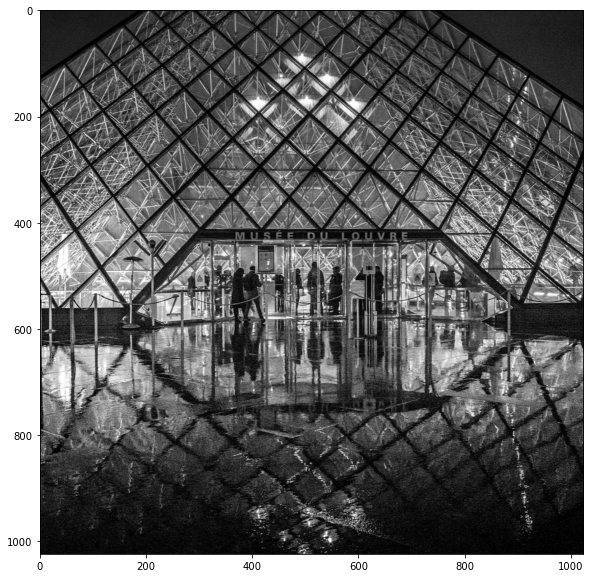

In [37]:
X = cv2.imread('louvre.png',0)
print('size = ',X.shape)
plt.figure(figsize=(10,10))
#plt.axis('off')
plt.imshow(X,cmap='gray')
plt.show()

# Transformación Geométrica

Coordenadas imagen de entrada ${\bf X}$: $(i_0,j_0)$

Coordenadas imagen de salida ${\bf Y}$: $(i,j)$



$i_0 = a_{11}i + a_{12}j+a_{13}$

$j_0 = a_{21}i + a_{22}j+a_{23}$

siendo ${\bf m} = [i \ j \ 1]^{\sf T}$ y ${\bf m}_0 = [i_0 \ j_0 \ 1]^{\sf T}$, entonces:

${\bf m}_0 = {\bf A}{\bf m}$

In [38]:
x = 'None'
if x is None:
  print('x')

In [39]:
# Implementación de interpolación se realiza por truncamiento
def geo_transformation(X,A,Yshape=None):

  if Yshape is None:
    (N,M) = X.shape
  else:
    (N,M) = Yshape
  Y = np.zeros((N,M),np.uint8)

  m = np.ones((N*M,3))
  t = 0
  for i in range(N):
    for j in range(M):
      m[t,0:3] = [i,j,1]
      t = t+1

  m0  = np.dot(A,m.T)          # (i,j) -> (i0,j0) usando ecuación indicada arriba
  mpf = np.fix(m0).astype(int) # truncamiento

  # verificación que las coordenadas (i0,j0) pertenezcan a la imagen
  i0 = mpf[0,:]
  j0 = mpf[1,:]
  kti = np.logical_and(i0>=0,i0<N)
  ktj = np.logical_and(j0>=0,j0<M)
  kt  = np.logical_and(kti,ktj)

  # poblamiento de la imagen de salida
  t = 0
  for i in range(N):
    for j in range(M):
      if kt[t]:
        Y[i,j] = X[i0[t],j0[t]]
      t = t+1
  return Y

# Traslación

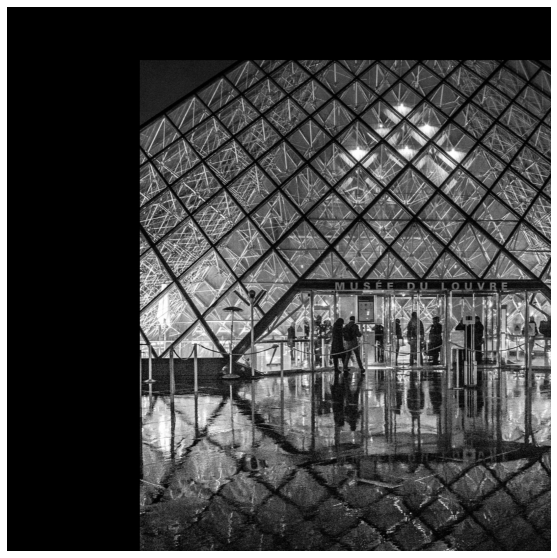

In [40]:
a11 = 1
a12 = 0
a13 = -100

a21 = 0
a22 = 1
a23 = -250

a1 = np.array([a11,a12,a13])
a2 = np.array([a21,a22,a23])

A  = np.vstack([a1,a2])

Y = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(Y,cmap='gray')
plt.show()


# Rotación

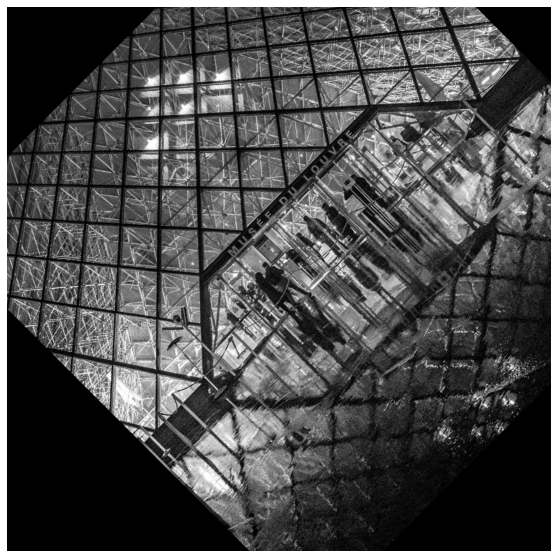

In [41]:
theta = 45.0 / 180.0 * np.pi  


a11 = np.cos(theta)
a12 = np.sin(theta)
a13 = -200

a21 = -np.sin(theta)
a22 =  np.cos(theta)
a23 = 400

a1 = np.array([a11,a12,a13])
a2 = np.array([a21,a22,a23])

A  = np.vstack([a1,a2])

Y = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(Y,cmap='gray')
plt.show()


# Escala

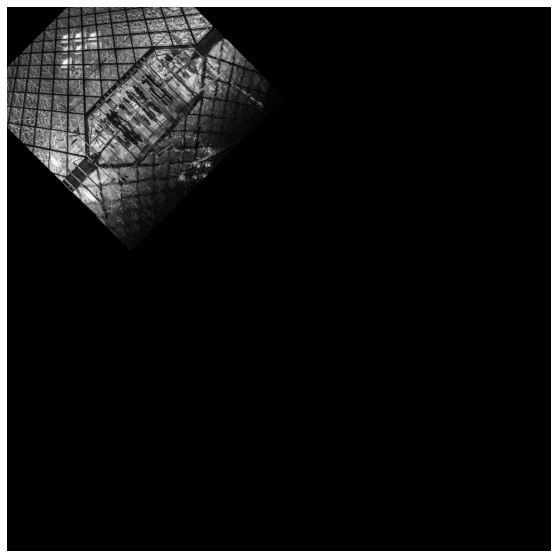

In [42]:
theta = 45.0 / 180.0 * np.pi 

s     = 2.5


a11 = s*np.cos(theta)
a12 = s*np.sin(theta)
a13 = -200

a21 = -s*np.sin(theta)
a22 =  s*np.cos(theta)
a23 = 400

a1 = np.array([a11,a12,a13])
a2 = np.array([a21,a22,a23])

A  = np.vstack([a1,a2])

Y = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(Y,cmap='gray')
plt.show()


# Corrección de Reloj

Según algoritmo de [Trasnformación Afín](https://github.com/domingomery/imagenes/blob/master/clases/Cap03_Mejoramiento_Espacio/presentations/IMG03_Conversion_Elipse_Circulo.pdf) para transformar una elipse en un círculo.

In [43]:
url_imagen = "https://github.com/joseramoniglesias/Tratamiento_Senales/blob/main/clases/Cap03_Mejoramiento_Espacial/Matlab_Python/clock.png"
nombre_local_imagen = "clock.png" # El nombre con el que queremos guardarla
imagen = requests.get(url_imagen).content
with open(nombre_local_imagen, 'wb') as handler:
  handler.write(imagen)

size =  (756, 1008)


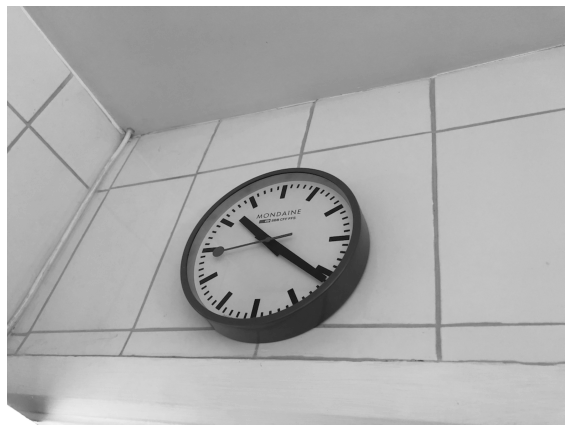

In [51]:
X = cv2.imread('clock.png',0)
print('size = ',X.shape)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(X,cmap='gray')
plt.show()

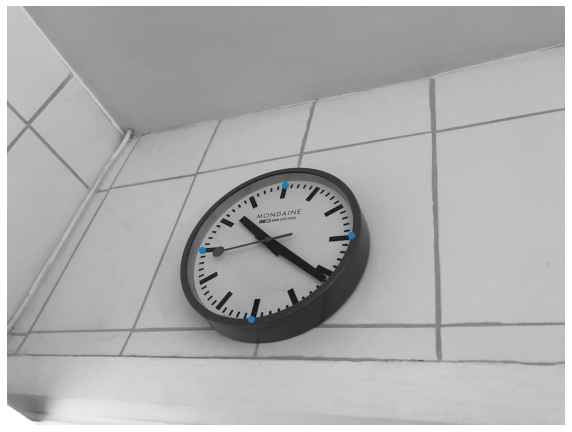

In [52]:
# Coordenadas (i,j) ingresadas a mano de las marcas 12, 3, 6 y 9:
b1 = np.array([322,502]).reshape(2,1)   # 12:00
b2 = np.array([412,620]).reshape(2,1)   # 03:00
b3 = np.array([565,440]).reshape(2,1)   # 06:00
b4 = np.array([440,352]).reshape(2,1)   # 09:00

i = [b1[0],b2[0],b3[0],b4[0]]
j = [b1[1],b2[1],b3[1],b4[1]]

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(X,cmap='gray')
plt.scatter(j,i)
plt.show()


In [53]:
# En la salida, las cuatro manecillas están en las coordenadas (q+/-r,q+/-r)
r  = 200.0
q  = 400
m  = np.array([0,0,0])

#c1 = np.array([d,r+d,1])
c1 = np.array([q-r,q,1])
X1 = np.vstack([np.hstack([c1,m]),np.hstack([m,c1])]) 

#c2 = np.array([r+d,2*r+d,1])
c2 = np.array([q,q+r,1])
X2 = np.vstack([np.hstack([c2,m]),np.hstack([m,c2])]) 

#c3 = np.array([2*r+d,r+d,1])
c3 = np.array([q+r,q,1])
X3 = np.vstack([np.hstack([c3,m]),np.hstack([m,c3])]) 

#c4 = np.array([r+d,d,1])
c4 = np.array([q,q-r,1])
X4 = np.vstack([np.hstack([c4,m]),np.hstack([m,c4])]) 

A  = np.vstack([X1,X2,X3,X4])
b  = np.vstack([b1,b2,b3,b4])
# t  = inv(A'*A)*A'*b;
         
t = np.linalg.lstsq(A, b, rcond=None)[0]


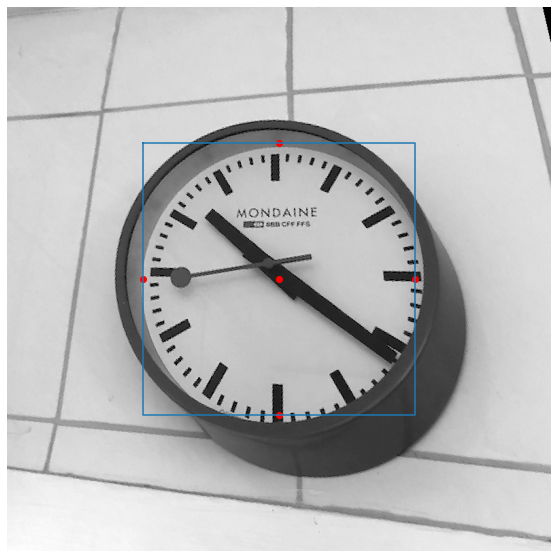

In [54]:
a1 = np.array([t[0],t[1],t[2]]).reshape(1,3)
a2 = np.array([t[3],t[4],t[5]]).reshape(1,3)

A  = np.vstack([a1,a2])

Y = geo_transformation(X,A,(2*q,2*q))
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(Y,cmap='gray')

i = np.array([q-r,q-r,q+r,q+r,q-r])
j = np.array([q-r,q+r,q+r,q-r,q-r])
plt.plot(j,i)

i = [c1[0],c2[0],c3[0],c4[0],q]
j = [c1[1],c2[1],c3[1],c4[1],q]
plt.scatter(j,i,c='red')

plt.show()